In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The provided dictionary
inv_heat_map = {
    (0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 13069.400080159407, (4, 0): 32695.203770832202,
    (5, 0): 46856.895169042335, (6, 0): 58506.34546160595, (7, 0): 64226.41033108407,
    (8, 0): 68532.99806846355, (0, 1): -1, (1, 1): 0.0, (2, 1): 0.0,
    (3, 1): 13580.975070186103, (4, 1): 40849.01305188712, (5, 1): 60408.316398805335,
    (6, 1): 74604.63713190332, (7, 1): 75699.36047649669, (8, 1): 76301.32384096207,
    (0, 2): -1, (1, 2): 0.0, (2, 2): 0.0, (3, 2): 13741.72078145863,
    (4, 2): 44787.768314346016, (5, 2): 72061.13602982779, (6, 2): 91013.56192514447,
    (7, 2): 85320.68985635949, (8, 2): 84759.97206613555, (0, 3): -1,
    (1, 3): -1, (2, 3): 0.0, (3, 3): 23192.039085380617, (4, 3): 48894.73956145641,
    (5, 3): 77513.56298181207, (6, 3): 100913.1850276236, (7, 3): 97458.23820320841,
    (8, 3): 92416.77374795558,  (0, 4): -1, (1, 4): -1, (2, 4): -1,
    (3, 4): 21258.319539579126, (4, 4): 56530.53864085846, (5, 4): 81007.07819701753,
    (6, 4): 107141.57587705174, (7, 4): 103232.0938972112, (8, 4): 100282.30769307801,
     (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): -1,
    (5, 5): -1, (6, 5): 88757.83313324174, (7, 5): 89829.4144207225, (8, 5): 95525.92087372013
}

/var/folders/0s/qypk53qx37jbg8qwrmx9x_xr0000gp/T/ipykernel_3450/2796476978.py:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color='white')


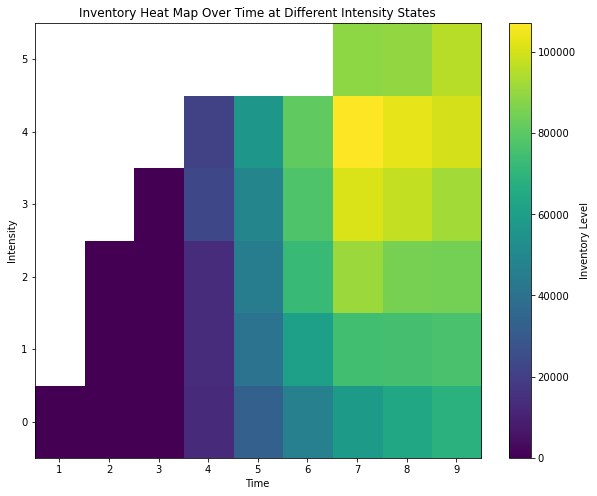

<Figure size 432x288 with 0 Axes>

In [5]:
# Create arrays for plotting
times = sorted(set(k[0]+1 for k in inv_heat_map.keys()))
intensities = sorted(set(k[1] for k in inv_heat_map.keys()))
heatmap_data = np.full((len(intensities), len(times)), np.nan)

for (t, i), value in inv_heat_map.items():
    heatmap_data[i, t] = value

# Mask out the cells with value -1
masked_heatmap_data = np.ma.masked_where(heatmap_data == -1, heatmap_data)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis
cmap.set_bad(color='white')
plt.imshow(masked_heatmap_data, cmap=cmap, aspect='auto', origin='lower')
plt.colorbar(label='Inventory Level')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Inventory Heat Map Over Time at Different Intensity States')
plt.xticks(range(len(times)), times)
plt.yticks(range(len(intensities)), intensities)
plt.show()
plt.savefig('FA-inv-heatmap-D.png');